# 편의점 지수 prj
**1. 시도별 편의점 수**

**2. 지역(시/도군구)별 색상지도와 카토그램 만들기**

**3. 시도별로 어떤 편의점이 많을까? 색상지도와 카토그램 만들기**

In [1]:
import pandas as pd
import numpy as np
import re
from plotnine import *
import folium

In [2]:
# 2018 상권데이터 불러오기
shop1 = pd.read_csv('data/201806_01.csv')
shop2 = pd.read_csv('data/201806_02.csv')
shop3 = pd.read_csv('data/201806_03.csv')
shop4 = pd.read_csv('data/201806_04.csv')

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# 합치고 편의점을 뽑으려니 렉이 걸린다 ;-; 하나씩 해주자
store1 = shop1[shop1['상권업종소분류명'].str.contains('편의점')]
store2 = shop2[shop2['상권업종소분류명'].str.contains('편의점')]
store3 = shop3[shop3['상권업종소분류명'].str.contains('편의점')]
store4 = shop4[shop4['상권업종소분류명'].str.contains('편의점')]

In [4]:
# 편의점 데이터 합치기
frames = [store1, store2, store3, store4]
store_sum = pd.concat(frames)

C:\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


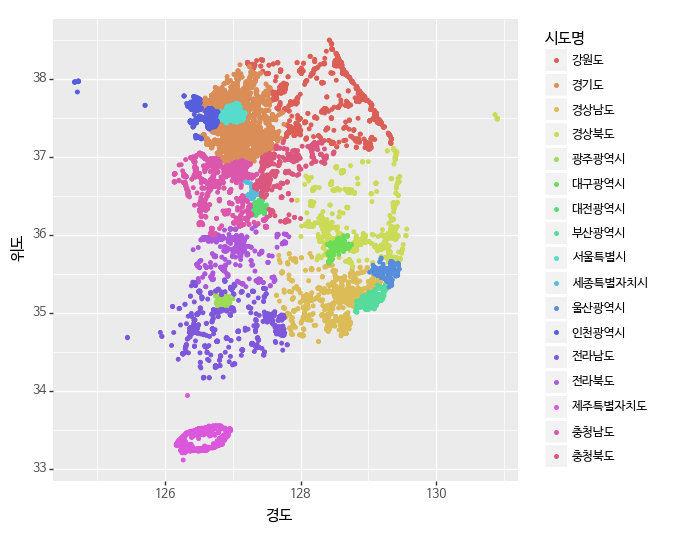

<ggplot: (-9223372036734198703)>

In [37]:
# 전 지역 데이터가 있는지 찍어보자~ 다있는 것 같당
(ggplot(store_sum)
 + aes(x='경도', y='위도', color='시도명')
 + geom_point(size=1)
 + theme(text=element_text(family='NanumBarunGothic'),
        figure_size=(6, 6))
)

In [8]:
# 시도명과 시군구명을 합쳐서 지역칼럼만들기
store_sum['지역'] = store_sum['시도명'] + ' ' + store_sum['시군구명']

In [9]:
# 지역칼럼 넣어줌
store = store_sum[['상호명', '지역', '시도명', '시군구명', '시도코드', '시군구코드',
              '도로명주소', '경도', '위도']]
store.head(2)

,상호명,지역,시도명,시군구명,시도코드,시군구코드,도로명주소,경도,위도
379,코리아세븐하단제휴점,부산광역시 사하구,부산광역시,사하구,26,26380,부산광역시 사하구 낙동대로 474,128.968208,35.107159
528,GS25해운리베라,부산광역시 해운대구,부산광역시,해운대구,26,26350,부산광역시 해운대구 구남로29번길 26,129.161980,35.162279


# 1. 시도별 편의점 수

In [11]:
# 시도별 편의점 매장 수 세서 저장!
sido = store['시도명'].value_counts()
sido.head()

경기도      12647
서울특별시     8323
경상남도      3207
부산광역시     2695
인천광역시     2618
Name: 시도명, dtype: int64

In [12]:
# sido로 지역별 매장 df 만들기
sido_df = sido.rename_axis('시도명').reset_index(name='counts')
sido_df

,시도명,counts
0,경기도,12647
1,서울특별시,8323
2,경상남도,3207
3,부산광역시,2695
4,인천광역시,2618
5,충청남도,2476
6,경상북도,2211
7,강원도,2169
8,충청북도,1732
9,전라북도,1634


C:\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


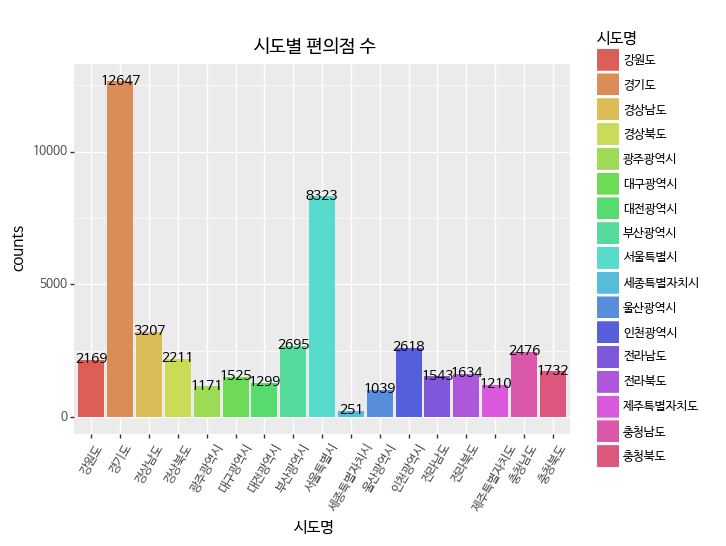

<ggplot: (114881814)>

In [13]:
(ggplot(sido_df, aes(x='시도명', y='counts', fill='시도명'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('시도별 편의점 수')
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=60))
 + geom_text(aes(label='counts'), size=10)
)

In [148]:
# 에러 난다면 아나콘다프롬프트에서 conda install shapely
# !pip install folium shapely

In [14]:
# 시군구별 편의점 매장 수 세서 저장
gungu = store['시군구명'].value_counts()
gungu.head()

서구     1266
남구     1171
중구     1122
북구      933
화성시     866
Name: 시군구명, dtype: int64

In [47]:
# gungu로 지역별 매장 df 만들기
gungu_df = gungu.rename_axis('시군구명').reset_index(name='counts')
gungu_df.head()

,시군구명,counts
0,서구,1266
1,남구,1171
2,중구,1122
3,북구,933
4,화성시,866


# 2. 지역별 색상지도
(애란쌤 Dorling 카토그램 흉내내기 코드 참고)

In [17]:
from urllib import request
import json
import numpy as np
import random

import folium
from shapely.geometry import Polygon, MultiPolygon
import pandas as pd  

with request.urlopen("https://cdn.rawgit.com/southkorea/southkorea-maps/e6c6788d/kostat/2013/json/skorea_municipalities_geo_simple.json") as f:
  geo = json.load(f)

In [38]:
# geo 데이터 불러오기
features = geo["features"]
objs = []
for feature in features:
  geometry = feature["geometry"]
  if geometry["type"] == "Polygon":
    polygon = Polygon(geometry["coordinates"][0])
  else:
    polygon = MultiPolygon([Polygon(g) for g in geometry["coordinates"][0]])
  objs.append({
    "code": feature["properties"]["code"],
    "name": feature["properties"]["name"],
    "lon": polygon.centroid.x,
    "lat": polygon.centroid.y,
    "value": np.random.randn() + 5,
  })

df = pd.DataFrame({
    "시군구코드": [o["code"] for o in objs],
    "시군구명": [o["name"] for o in objs],
    "경도": [o["lon"] for o in objs],
    "위도": [o["lat"] for o in objs]
})
df.head()

,시군구코드,시군구명,경도,위도
0,39020,서귀포시,126.583280,33.320753
1,39010,제주시,126.956961,33.503819
2,38400,합천군,128.143441,35.573566
3,38390,거창군,127.905387,35.729535
4,38380,함양군,127.724114,35.546394


In [58]:
# counts 칼럼머지해주기
test = pd.merge(df, gungu_df,on=['시군구명'])
test.head()

,시군구코드,시군구명,경도,위도,counts
0,39020,서귀포시,126.583280,33.320753,431
1,39010,제주시,126.956961,33.503819,779
2,38400,합천군,128.143441,35.573566,15
3,38390,거창군,127.905387,35.729535,49
4,38380,함양군,127.724114,35.546394,22


In [57]:
map = folium.Map(location=[test['경도'].mean(), test['위도'].mean()], zoom_start=7, tiles='Mapbox Bright')

map.choropleth(
  geo_data=geo,
  data=test,
  columns=['시군구코드', 'counts'],
  key_on='feature.properties.code',
  fill_color='YlGn',
  fill_opacity=1.0,
  line_opacity=0.2,
  legend_name='Random',
)
map

## !!위 색상지도의 문제점
**1. 노랑색으로 칠해진 부분은 시군구명으로 머지할 때 매치되지 않은 행같다.**

-> 제대로 머지다시 해야함

**2. 색상지도로 하니 지역명이 나오지 않아 어느 지역인지 직관적으로 보기 어렵다.**

-> 위에 지역명을 표시할 수 있을까? 아니면 카토그램으로 아예 나눠서 색칠해보자.

-----
### 일단 일요일에 (전국 편의점별로 포인트색다르게해서 찍어보기)를 파보장
1. cu
2. gs
3. 세븐일레븐
4. 미니스톱
5. 이마트와 위드미

**어떤 상호명으로 저장되어 있는지 확인하고, 정규표현식으로 데이터 프레임 만들기**

In [82]:
store['상호명'].value_counts()

CU                  8749
GS25                7152
세븐일레븐               5649
미니스톱                1690
위드미                  787
STORYWAY             146
이마트                  135
365플러스편의점             89
24시편의점                87
편의점사랑                 87
편의점                   85
씨스페이스                 79
GS25시                 73
베스트올                  60
GS                    56
썬마트                   53
gs25                  51
IGA마트                 49
아이지에이마트               47
인더라인25                37
코리아세븐부산               37
25시편의점                35
코리아세븐대구               33
하프타임                  33
세븐                    30
GS25편의점               30
로그인                   29
조이마트                  28
코리아세븐인천               28
세븐편의점                 28
                    ... 
GS25시북가좌초교점            1
씨유대림하나                 1
CU제주해모루점               1
진접24시편의점               1
세븐일레븐울산신정중앙            1
CU송내명성점                1
미니스톱여천중앙점              1
세븐일레븐구미상모대로점           1
CU포항상도제일점              1
